In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../data/frames/android.timeseries')

In [3]:
def make_fig(df, words, years, ax):
    w1, w2, w3 = words
    year1, year2 = years
    df = df[(df['years']>=year1) & (df['years']<year2)]
    df[f'P(\'{w2}\' | \'{w1}\')'] = df['nw1&w2'] / (.01 + df['nw1'])
    df[f'P(\'{w3}\' | \'{w1}\')'] = df['nw1&w3'] / (.01 + df['nw1'])
    ax.plot(df['years'],df[f'P(\'{w2}\' | \'{w1}\')'],'o-')
    ax.plot(df['years'],df[f'P(\'{w3}\' | \'{w1}\')'],'o--')
    ax.legend([f'P(\'{w2}\' | \'{w1}\')',f'P(\'{w3}\' | \'{w1}\')'])
    ax.axis('tight');

/hg191/sandeep/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/hg191/sandeep/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


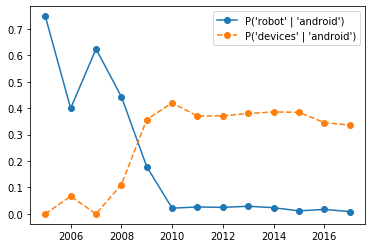

In [4]:
make_fig(df, ('android','robot','devices'), (2005,2018), plt.gca())

In [5]:
df2 = pd.read_csv('../data/frames/laundering.timeseries')

In [6]:
# decades!
df2 = df2.groupby((df2['years']//10)*10).sum()
df2['years'] = df2.index

/hg191/sandeep/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/hg191/sandeep/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


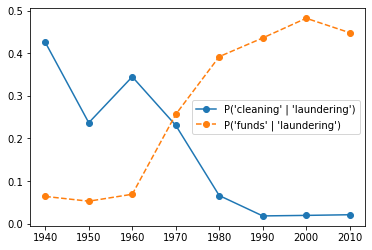

In [7]:
make_fig(df2, ('laundering','cleaning','funds'), (1940,2018), plt.gca())

/hg191/sandeep/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/hg191/sandeep/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


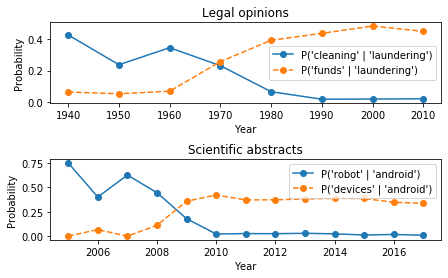

In [13]:
fig,ax = plt.subplots(2,1,figsize=[7,4])
plt.subplots_adjust(hspace=.7)
make_fig(df, ('android','robot','devices'), (2005,2018), ax[1])
ax[1].set_title('Scientific abstracts')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Probability')
make_fig(df2, ('laundering','cleaning','funds'), (1940,2018), ax[0])
ax[0].set_title('Legal opinions')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Probability')

plt.savefig('time-series.pdf',bbox_inches='tight');

In [14]:
pwd

'/hg191/sandeep/projects/CompLingLab/semantic-lang-change/notebooks'